In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu
from scipy.linalg import solve
from scipy.linalg import inv
from numpy.linalg import matrix_rank
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.colors as mcolors
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats

# Differential Equation 

What is a **differential equation**? 

Differential equation is **a equation that relates one function and its derivative.**

For example, $\frac{df(x)}{dx} = f(x)$



### Separable Equation 

Say I have the following differential equation. 

$\frac{df(x)}{dx} = G(x, f(x))$

and $G(x, f(x)) = g(x) \cdot f(x)$

therefore, $\frac{df(x)}{dx} = g(x) \cdot f(x)$

Then I can rearrange as the following: 

$F(x) \cdot df(x) = g(x) \cdot dx$

If the following rearrangement is possible, then the equation is a separable equation.

### Exponential Models

**Modeling Population** 

$P = Population \ \ $ and $ \ \ t = time$

Suppose the population is a function $t$, $P(t)$. 

And $\frac{dP(t)}{dt} = K \cdot P(t)$

This is a reasonable model, because bigger the population, bigger the rate of change it will be. The bigger population will give more birth. 

For the given differential equation, we would like to know what $P(t)$ is. 

Since this is separable, let's rearange them. 

$\frac{1}{P(t)} dP(t) = K dt$

and take the integral on both sides. 

$\int \frac{1}{P(t)} dP(t) = \int K dt$

$ln(P(t)) + C_1 = Kt + C_2$

$ln(P(t)) = Kt + C$

$P(t) = e^{Kt + C}$

$P(t) = e^C \cdot e^{Kt}$

$P(t) = C^* \cdot e^{Kt}$

And say we observe $(t_0,P_0) = (0,10)$ and $(t_1,P_1) = (5,12)$

If we plug in the values for $(t_0,P_0) = (0,10)$, then we get $C^* = 10$

Therefore, $P(t) = 10 \cdot e^{Kt}$

And we have to figure out what $K$ is. So we plug in $(t_1,P_1) = (5,12)$ into the equation.  

$\frac{6}{5} = e^{5 \cdot k}$

$ln(\frac{6}{5}) = 5k$

$k = \frac{ln(\frac{6}{5})}{5}$

Finally, we have to complete equation for $P(t)$

$P(t) = 10 \cdot e^{k \cdot t}$

I won't put the whole equation here, because it doesn't look pretty altogether. But you can just plug in $k$ into the final equation.



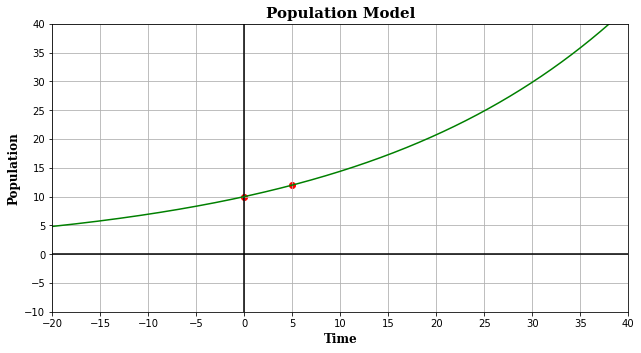

In [60]:
from numpy import log as ln

fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])

ax.set_ylim(-10, 40)
ax.set_xlim(-20, 40)
ax.set_xlabel('Time', fontsize='large', fontfamily='serif', fontweight='bold')
ax.set_ylabel('Population', fontsize='large', fontfamily='serif', fontweight='bold')
ax.grid()

ax.axvline(x=0, color="black")
ax.axhline(y=0, color="black")

ax.xaxis.set_major_locator(MultipleLocator(5.00))
ax.yaxis.set_major_locator(MultipleLocator(5.00))

t = np.arange(-20,40,0.01)
e = np.e 

exponent = (ln(6/5)*t)/5
pop = 10 * e**(exponent)

ax.plot(t, pop, color='green')
ax.scatter(0,10, color='red')
ax.scatter(5,12, color='red')

ax.set_title('Population Model', fontsize=15, fontfamily='serif', ma='center', fontweight='bold')
plt.show()

**Side note** 

This is something I found accidently. 

$\int x \ ln(x) \ dx$

I would like to know the integral of $x \ ln(x)$. How should I solve it? Well, I have to use the **integration by parts**. 

$\frac{df(x)g(x)}{dx} = f'(x) \cdot g(x) + g'(x) \cdot f(x)$

$\int \frac{df(x)g(x)}{dx} dx = \int f'(x) \cdot g(x) \ dx + \int g'(x) \cdot f(x) \ dx$

$f(x) \cdot g(x) = \int f'(x) \cdot g(x) \ dx + \int g'(x) \cdot f(x) \ dx$

We can rearrange 

$\int f'(x) \cdot g(x) \ dx = f(x) \cdot g(x) - \int g'(x) \cdot f(x) \ dx$

And we can suppose that $\int f'(x) \cdot g(x) \ dx = \int x \ ln(x) \ dx$ 

$\int x \ ln(x) \ dx = f(x) \cdot g(x) - \int g'(x) \cdot f(x) \ dx$

So from here, we can figure out the rest of it and find out the answer. 

Because we know that $f'(x) = x$ and $g(x) = ln(x)$

**Important Theorem** 

For a given differential equation, there might not be an unique solution, $y(x)$. In order for a differential equation to have a unique solution, $y(x)$, the following requirements has to be satisfied. 

1. A given differential equation can be rearranged into the following form: $\frac{dy}{dx} + p(x) \cdot y = Q(x)$

2. The functions, $p(x)$ and $Q(x)$ should be continuous. 

For example, let's say $p(x) = \frac{1}{x}$. Then the differential equation won't have a unique solution, $y(x)$ at the point where x =0. Because $\frac{1}{x}$ is not continuous at $x=0$. 

